In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isdir
from pathlib import Path

%matplotlib inline

In [4]:
imageclef_13 = Path('../data/imageclef_2013')
imageclef_15 = Path('../data/imageclef_2015')
imageclef_16 = Path('../data/imageclef_2016')

In [25]:
def get_classes(f):
    train = f / 'train'
    return [c for c in listdir(train) if (train / c).is_dir()]

def count_files(folder, labels):
    return [len(listdir(folder / lbl)) if (folder / lbl).exists() else 0 for lbl in labels]

def plot_distribution(classes, num_13, num_15, num_16):
    ind_x = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(ind_x - 0.2, num_13, width=0.2, color='b', align='center', label='clef13')
    ax.bar(ind_x, num_15, width=0.2, color='g', align='center', label='clef15')
    ax.bar(ind_x + 0.2, num_16, width=0.2, color='r', align='center', label='clef16')
    ax.set_xticks(ind_x + 0.2 / 2 )
    ax.set_xticklabels(classes)
    ax.legend()
    
def plot_distribution2(classes, y1, y2, lbl1, lbl2):
    ind_x = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(ind_x, y1, width=0.2, color='b', align='center', label=lbl1)
    ax.bar(ind_x + 0.2, y2, width=0.2, color='g', align='center', label=lbl2)    
    ax.set_xticks(ind_x + 0.2 / 2 )
    ax.set_xticklabels(classes)
    
    for i, v in enumerate(y1):
        ax.text(i, v + 0.2, str(v), horizontalalignment='right')
    for i, v in enumerate(y2):
        ax.text(i + 0.2, v + 0.2, str(v), horizontalalignment='left')
    
    ax.legend()

In [6]:
classes_13 = get_classes(imageclef_13)
classes_15 = get_classes(imageclef_15)
classes_16 = get_classes(imageclef_16)
classes_13.sort()
classes_15.sort()
classes_16.sort()

In [7]:
# COMP in imageclef_13 contained compounded images
classes_15.insert(0, 'COMP')
classes_16.insert(0, 'COMP')

In [8]:
num_files_13 = count_files(imageclef_13 / 'train', classes_13)
num_files_15 = count_files(imageclef_15 / 'train', classes_15)
num_files_16 = count_files(imageclef_16 / 'train', classes_16)

## Original distribution of images per Imageclef dataset

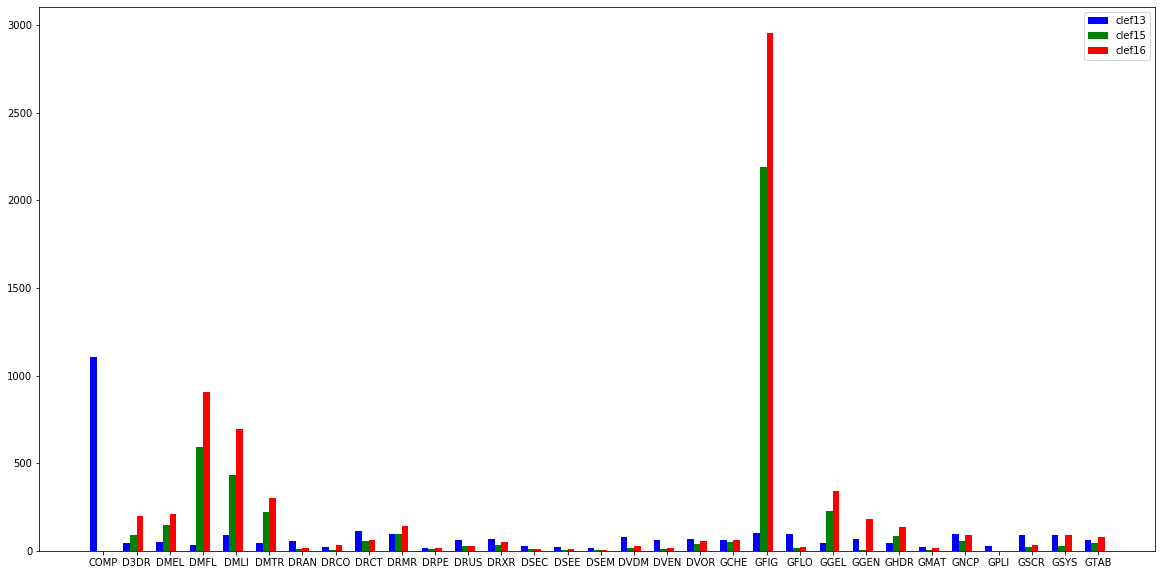

In [142]:
plot_distribution(classes_13, num_files_13, num_files_15, num_files_16)

## Dropping the COMP class

In [9]:
classes = classes_13[1:]
ds_clef_13 = num_files_13[1:]
ds_clef_15 = num_files_15[1:]
ds_clef_16 = num_files_16[1:]

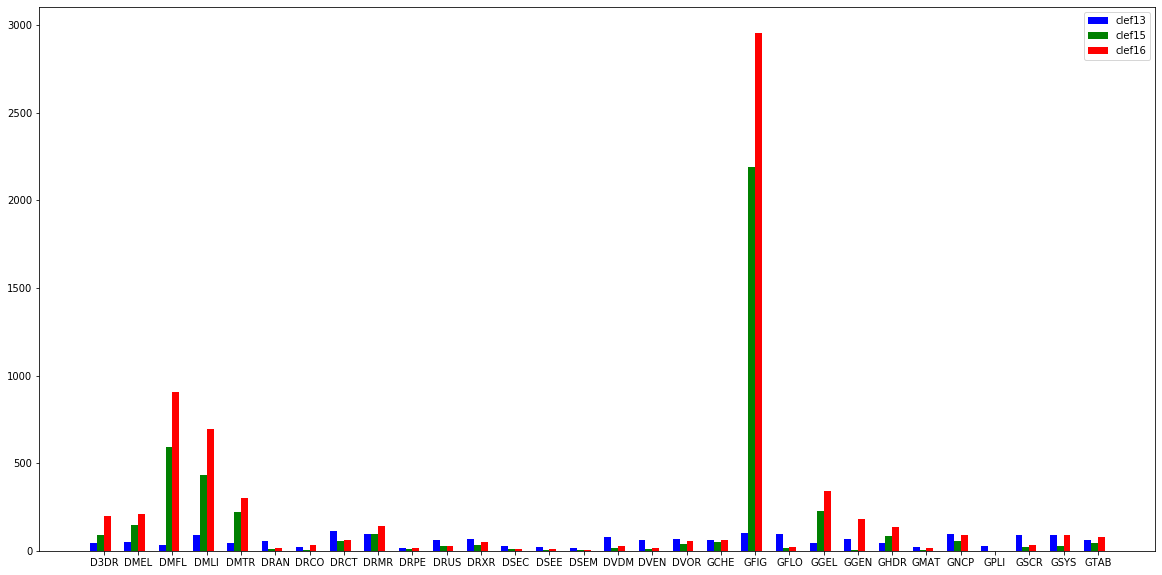

In [10]:
plot_distribution(classes, ds_clef_13, ds_clef_15, ds_clef_16)

In [11]:
total_clef_15 = np.sum(ds_clef_15)
total_clef_15

4532

In [12]:
total_clef_16 = np.sum(ds_clef_16)
total_clef_16

6776

In [13]:
total_clef_13 = np.sum(ds_clef_13)
total_clef_13

1775

## Datasets for ImageClef15 and ImageClef16

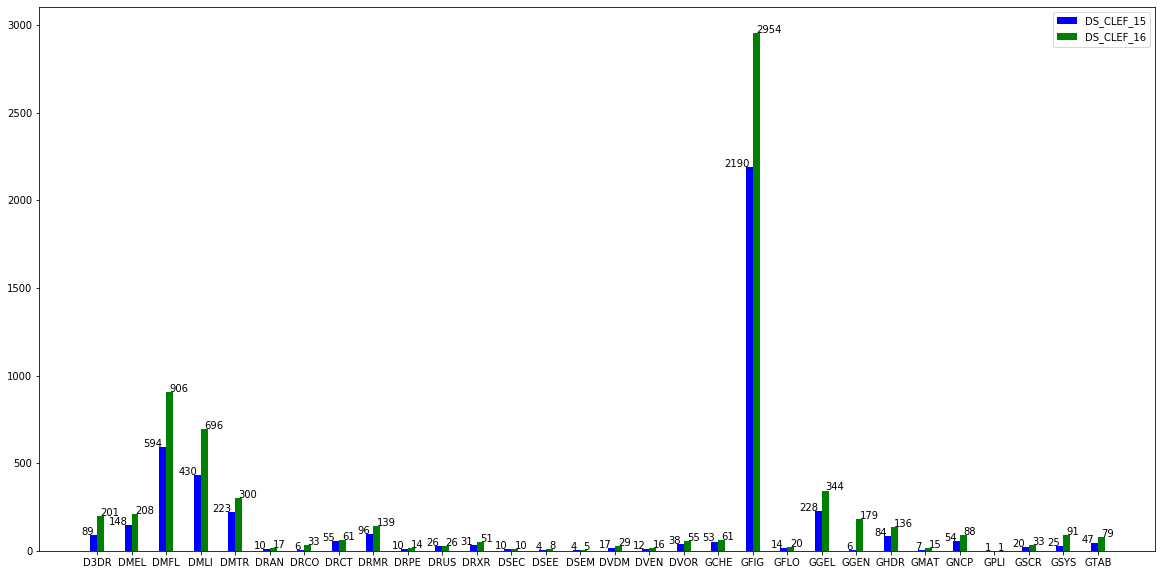

In [26]:
plot_distribution2(classes, ds_clef_15, ds_clef_16, 'DS_CLEF_15', 'DS_CLEF_16')

## Datasets for ImageClef15 and ImageClef16 with Augmentation 1 (adding ImageClef13)

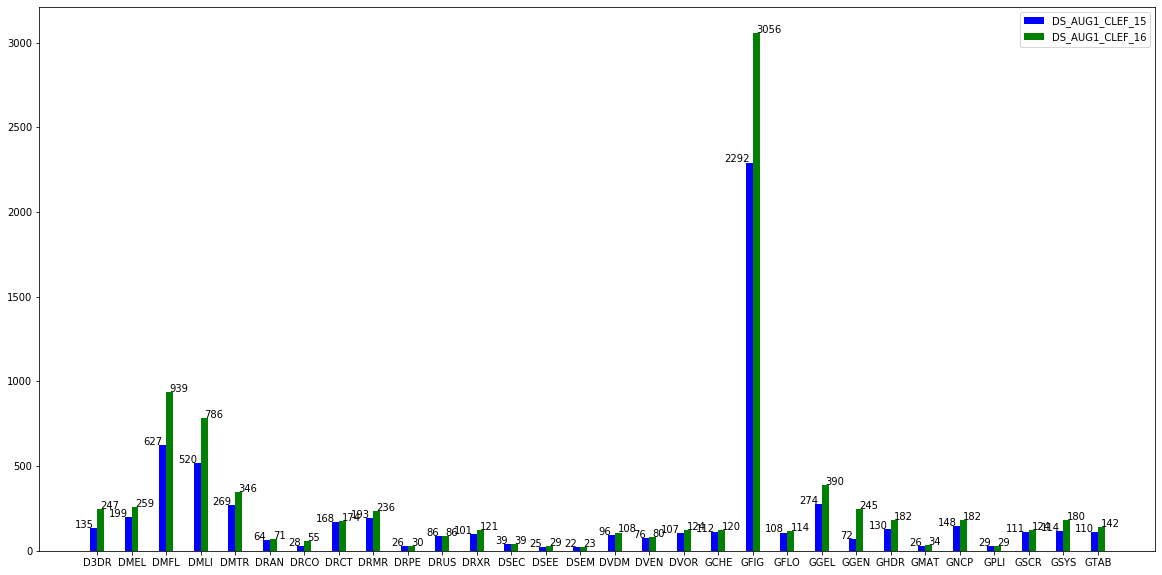

In [27]:
aug_clef_15 = np.array(ds_clef_15) + np.array(ds_clef_13)
aug_clef_16 = np.array(ds_clef_16) + np.array(ds_clef_13)
plot_distribution2(classes, aug_clef_15, aug_clef_16, 'DS_AUG1_CLEF_15', 'DS_AUG1_CLEF_16')

In [45]:
num_files_test_13 = np.array(count_files(imageclef_13 / 'test', classes_13)[1:])
num_files_test_15 = np.array(count_files(imageclef_15 / 'test', classes_15)[1:])
num_files_test_16 = np.array(count_files(imageclef_16 / 'test', classes_16)[1:])

In [46]:
np.sum(num_files_test_13) 

1573

In [1]:
from pathlib import Path

In [2]:
a = Path('/test/hey')

In [3]:
a.name

'hey'

In [2]:
classes = ['DMEL', 'DMFL', 'DMLI', 'DMTR']
samples_16 = np.array([208, 906, 696, 300])
samples_13 = np.array([51, 33, 90, 46])
test_16 = [88, 284, 405, 96]
train_samples = samples_13 + samples_16

In [3]:
train_samples

array([259, 939, 786, 346])

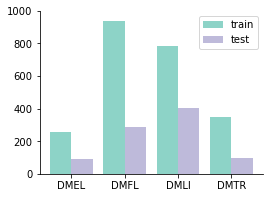

In [17]:
ind_x = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(4,3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar(ind_x, train_samples, width=0.4, color='#8dd3c7', align='center', label='train')
ax.bar(ind_x + 0.4, test_16, width=0.4, color='#bebada', align='center', label='test')
ax.set_xticks(ind_x + 0.4 / 2 )
ax.set_xticklabels(classes)
ax.set_ylim(0, 1000)
ax.legend()